In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv("/workspaces/machine_learning_codespaces-jupyter/data/wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']
df

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Malic Acid', ylabel='Density'>

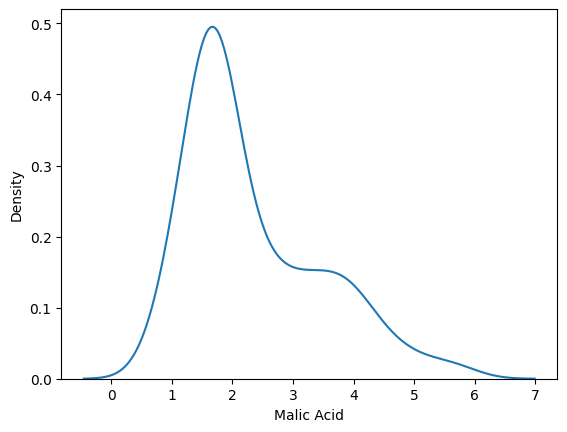

In [27]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Density'>

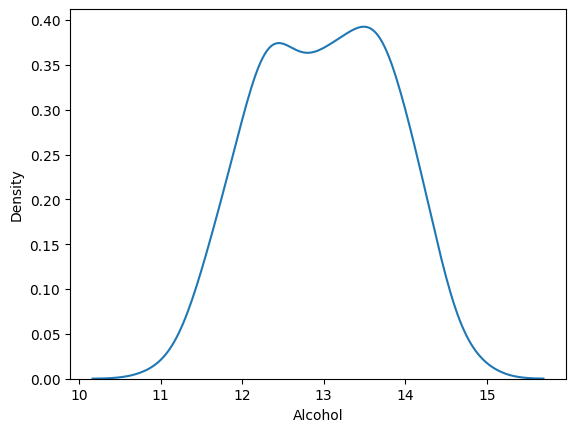

In [28]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

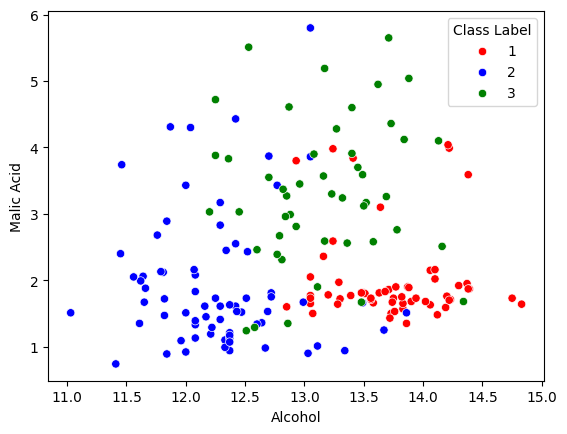

In [29]:
color_dict={1:"red",2:"blue",3:"green"}
sns.scatterplot(df,x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class Label'],palette=color_dict)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)
X_train

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [32]:
df.shape,X_train.shape,X_test.shape

((178, 3), (124, 2), (54, 2))

In [33]:
from sklearn.preprocessing import MinMaxScaler
scalar  = MinMaxScaler()

scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [34]:
X_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled

,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [37]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [38]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


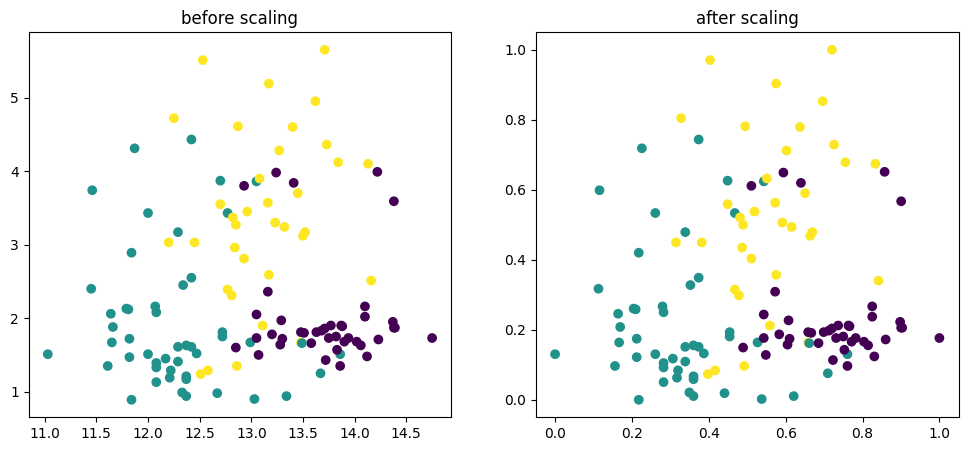

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c=y_train)
ax1.set_title("before scaling")

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("after scaling")

plt.show()

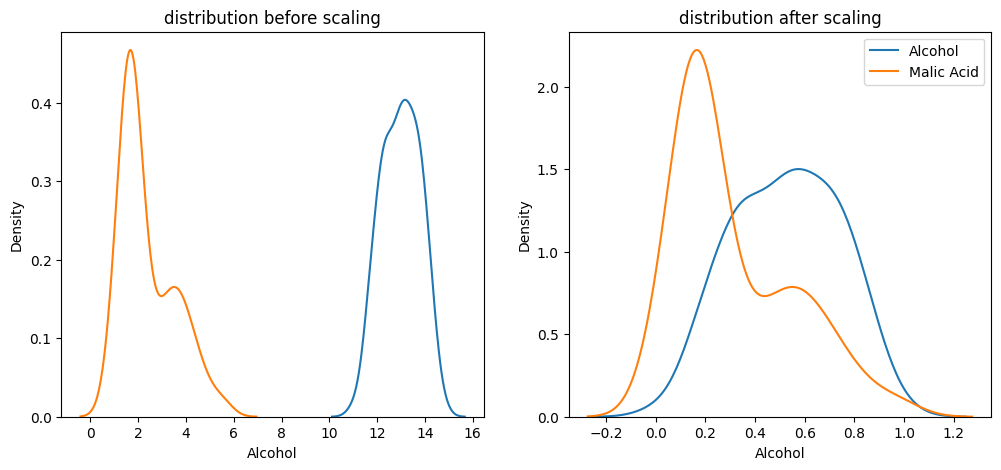

In [44]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Alcohol'],ax=ax1,label="Alcohol")
sns.kdeplot(X_train['Malic Acid'],ax=ax1,label="Malic Acid")
ax1.set_title("distribution before scaling")

sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2,label="Alcohol")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2,label="Malic Acid")
ax2.set_title("distribution after scaling")

plt.legend()
plt.show()

<Axes: xlabel='Alcohol', ylabel='Density'>

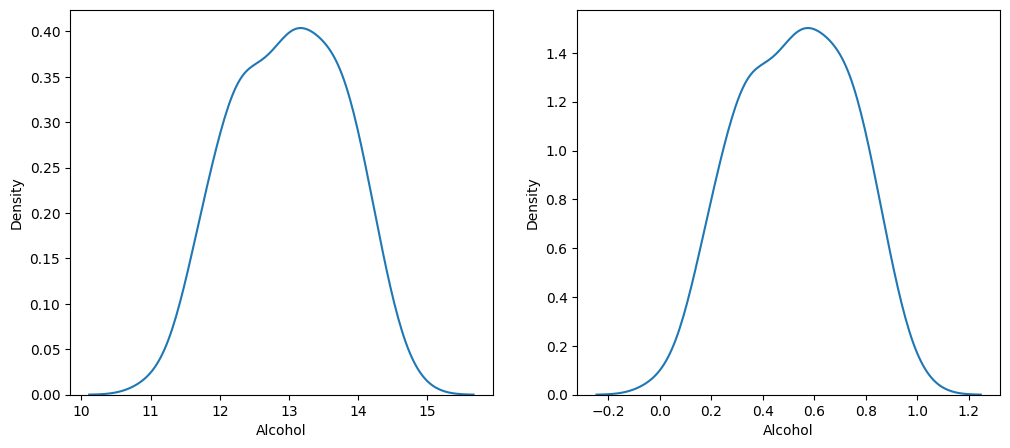

In [45]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Alcohol'],ax=ax1)
ax1.set_title("distribution before scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
ax2.set_title("distribution after scaling")

Text(0.5, 1.0, 'distribution after scaling')

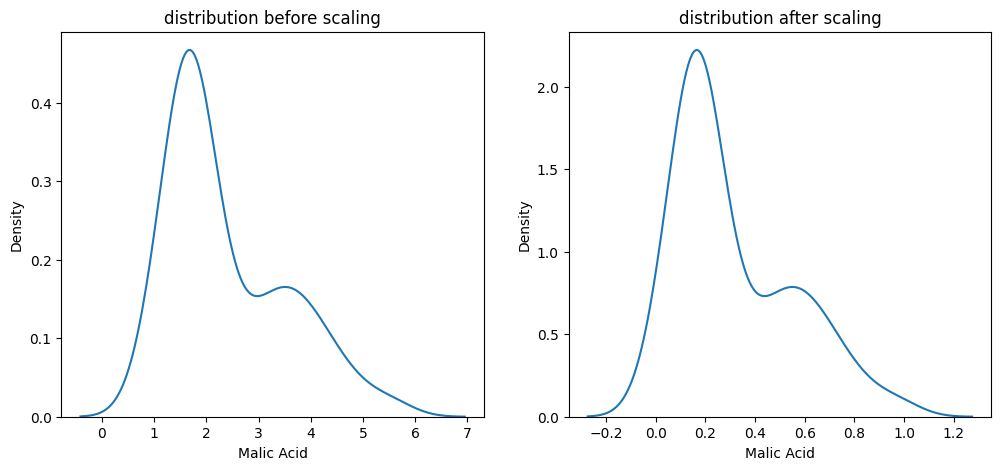

In [47]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(X_train['Malic Acid'],ax=ax1)
ax1.set_title("distribution before scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
ax2.set_title("distribution after scaling")